In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [5]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/aero2.bmp')

In [6]:
img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/milkdrop.bmp')

In [7]:
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [8]:
# 채널 나누기
R_img1, G_img1, B_img1=cv2.split(RGB_img1)
R_img2, G_img2, B_img2=cv2.split(RGB_img2)

In [9]:
# 출력 array 생성 후 0으로 초기화하기, unsigned byte(0~255) 로 설정
R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

In [14]:
# 고전적으로 과정 이해하며 더하기 계산 과정
# for 문 으로 픽셀 더하기 계산
for h in range(RGB_img1.shape[0]): # 영상 높이
  for w in range(RGB_img1.shape[1]): # 영상 너비
    r = np.int32(R_img1[h,w]) + np.int32(R_img2[h,w]) # 타입 변환하기
    if (r > 255):
      R_plus[h,w] = 255
    else:
      R_plus[h,w] = r
    g = np.int32(G_img1[h,w]) + np.int32(G_img2[h,w]) # 타입 변환하기
    if (g > 255):
      G_plus[h,w] = 255
    else:
      G_plus[h,w] = g
    b = np.int32(B_img1[h,w]) + np.int32(B_img2[h,w]) # 타입 변환하기
    if (b > 255):
      B_plus[h,w] = 255
    else:
      B_plus[h,w] = b


      if (g > 255):
        G_plus[h,w] = 255
      else:
        G_plus[h,w] = g
      b = np.int32(B_img1[h,w]) + np.int32(B_img2[h,w]) # 타입 변환하기
      if (b > 255):
        B_plus[h,w] = 255
      else:
        B_plus[h,w] = b


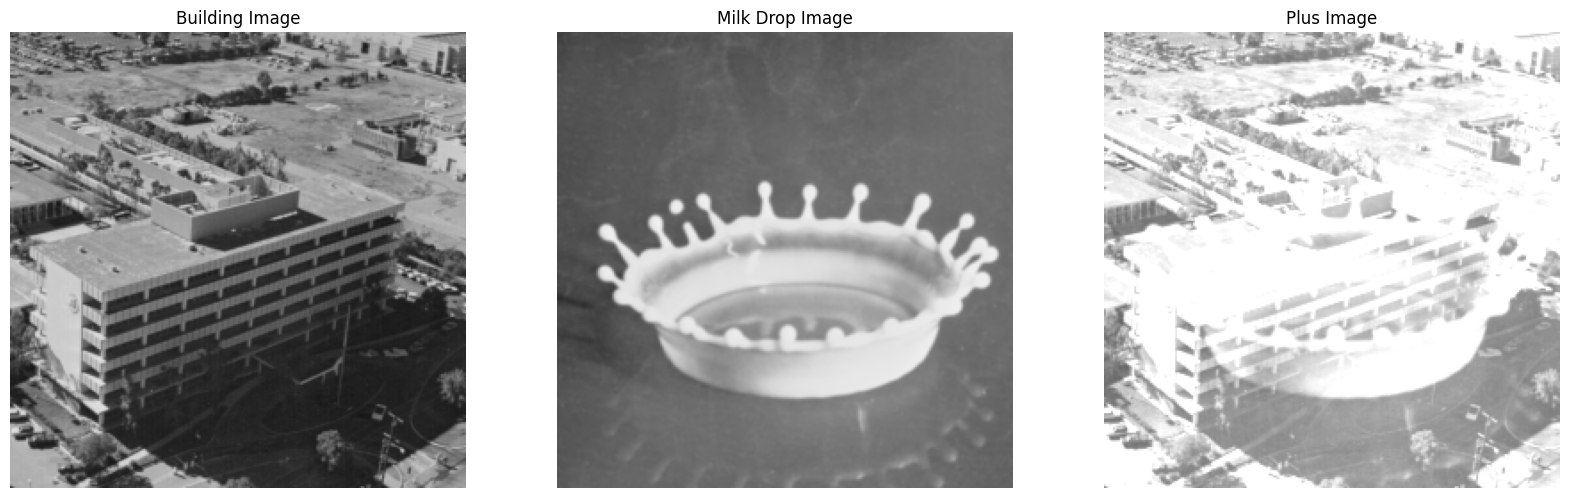

In [16]:
# 이미지 출력
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Building Image")
plt.imshow(RGB_img1)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Milk Drop Image")
plt.imshow(RGB_img2)
plt.axis("off")

plt.subplot(1,3,3)
output_img[:,:,0]=R_plus # R채널만 선택
output_img[:,:,1]=G_plus # G채널만 선택
output_img[:,:,2]=B_plus # B채널만 선택
plt.title("Plus Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()

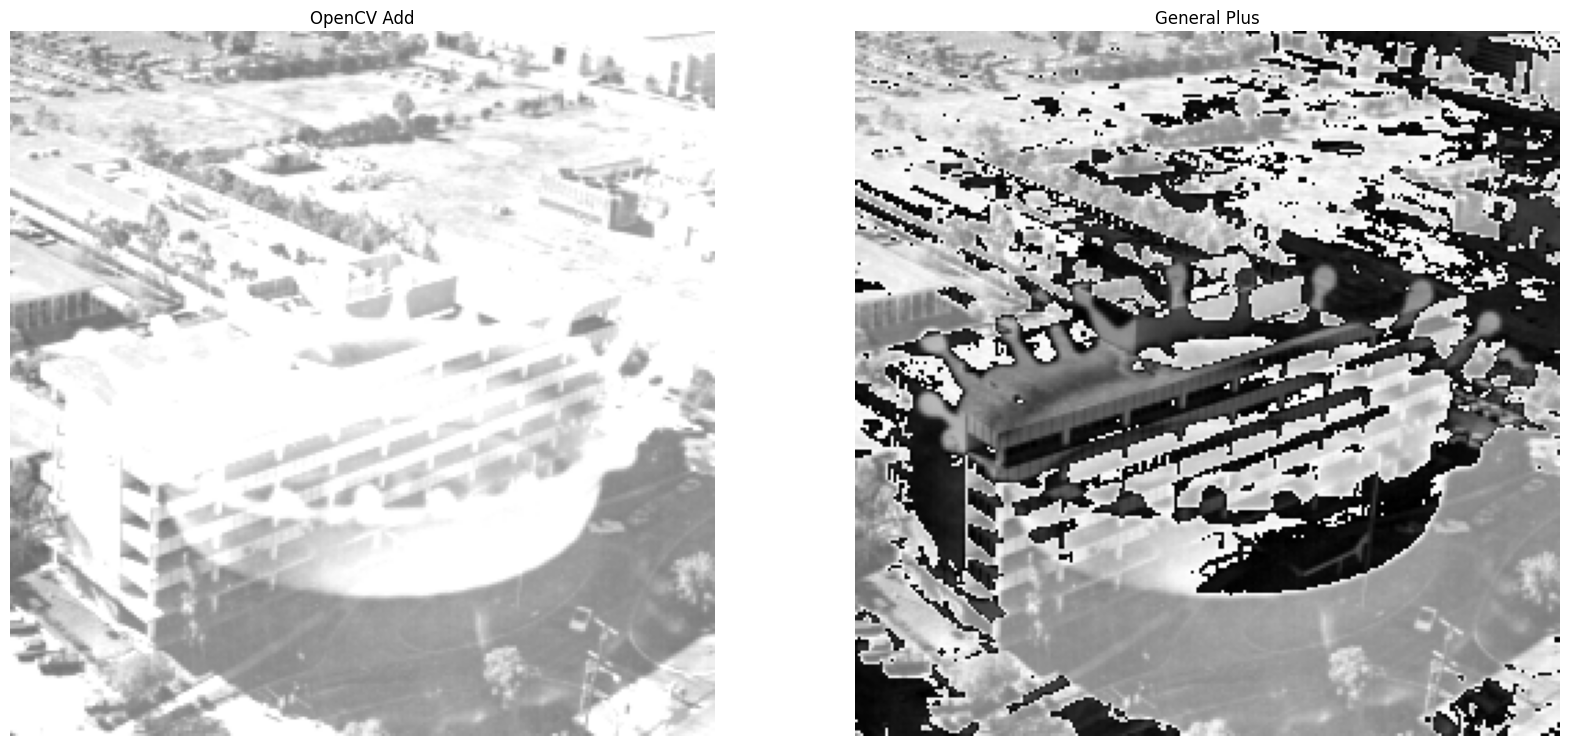

In [19]:
# openCV 이용하기
img_plus = img1+img2 # 일반적인 더하기 연산
img_add=cv2.add(img1,img2) # saturation 기능이 포함된 add함수 통한 더하기 연산 (255보다 크면 255)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("OpenCV Add")
plt.imshow(img_add)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("General Plus")
plt.imshow(img_plus)
plt.axis("off")
plt.show()


